# Naive Bayes Algorithams
1. A supervised machine learning algorithm
2. Based on Bayes’ Theorem
3. Assumes features are independent (naive assumption)
4. Very fast, especially good for text classification (spam detection, sentiment analysis)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = sns.load_dataset('iris')

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# Rename species to class
df.rename(columns={'species': 'class'}, inplace=True)

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# Step 2: Now Split the dataset into Independent and Dependent Features
# Independent features
x = df.drop(['class'], axis = 1)  # other way using  x = df.iloc[:,:-1]

# Dependent feature
y = df['class'] # other way also we do  y = df.iloc[:,-1]

In [23]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [52]:
# Using MinMaxScaler normalize data i.e., scale features to a specific range, usually 0 to 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)

In [33]:
x_scaler

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [54]:
# Now Split the Data into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.25, random_state = 42)

In [56]:
x_train

array([[0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.25      , 0.875     , 0.08474576, 0.        ],
       [0.41666667, 0.29166667, 0.69491525, 0.75      ],
       [0.47222222, 0.58333333, 0.59322034, 0.625     ],
       [0.66666667, 0.45833333, 0.62711864, 0.58333333],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.33333333, 0.16666667, 0.45762712, 0.375     ],
       [0.55555556, 0.33333333, 0.69491525, 0.58333333],
       [0.58333333, 0.45833333, 0.76271186, 0.70833333],
       [0.63888889, 0.41666667, 0.57627119, 0.54166667],
       [0.80555556, 0.66666667, 0.86440678, 1.        ],
       [0.38888889, 0.375     , 0.54237288, 0.5       ],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.36111111, 0.41666667, 0.59322034, 0.58333333],
       [0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.94444444, 0.33333333, 0.96610169, 0.79166667],
       [0.41666667, 0.29166667,

In [48]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [58]:
# Now use Gaussian Naive Bayes Algo to Traind and Predict 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [60]:
# Now Predict
y_pred = gnb.predict(x_test)

In [62]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')

In [64]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
22         setosa
15         setosa
65     versicolor
11         setosa
42         setosa
146     virginica
51     versicolor
27         setosa
Name: class, dtype: object

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_pred,y_test))
print("\nClassification Report:\n", classification_report( y_pred,y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_pred,y_test))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


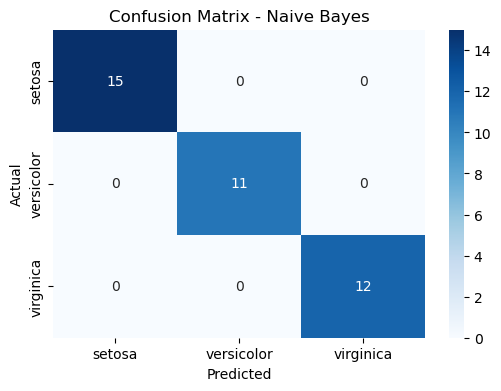

In [76]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Predict on test data
y_pred = gnb.predict(x_test)

# 2. Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot the matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


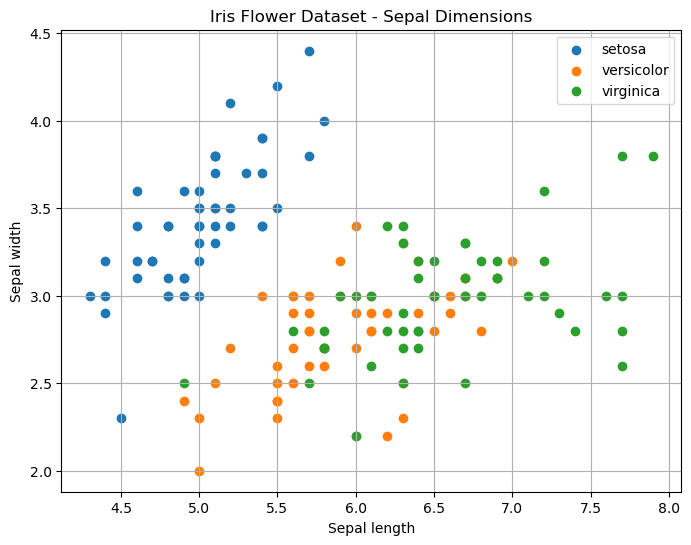

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Plot
plt.figure(figsize=(8,6))
for i, label in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=label)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Flower Dataset - Sepal Dimensions')
plt.legend()
plt.grid(True)
plt.show()
